# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.
R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [679]:
profit= pd.read_csv("50_Startups.csv")
profit

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [680]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [681]:
#check for missing values
profit.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# EDA

In [682]:
profit = profit.rename({'R&D Spend': 'RD','Marketing Spend':'MS'}, axis=1)
profit

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [602]:
#Creating dummy variable for State column
new=pd.get_dummies(profit,columns=['State'])

In [604]:
new
 

,RD,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [605]:
new = new.rename({'State_New York': 'State_NewYork' }, axis=1)
new

,RD,Administration,MS,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [606]:
new.dtypes

RD                  float64
Administration      float64
MS                  float64
Profit              float64
State_California      uint8
State_Florida         uint8
State_NewYork         uint8
dtype: object

In [607]:
  # Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_new = scaler.fit_transform(new)

In [550]:
scaled_new 

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.01120333e+00, -7.17740563e-01, -6.85994341e-01,
         1.39326109e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.99942997e+00,  1.39326109e+00, -6.85994341e-01,
        -7.17740563e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.98084225e+00, -7.17740563e-01,  1.45773797e+00,
        -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.77662724e+00, -7.17740563e-01, -6.85994341e-01,
         1.39326109e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.35774012e+00, -7.17740563e-01,  1.45773797e+00,
        -7.17740563e-01],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.12724963e+00, -7.17740563e-01, -6.85994341e-01,
         1.39326109e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.10548055e+00,  1.39326109e+00, -6.85994341e-01,
        -7.1774056

In [608]:
import pandas as pd

In [609]:
updated=pd.DataFrame(scaled_new, columns=['RD','Administration','MS','Profit','State_California','State_Florida','State_NewYork'])
updated

,RD,Administration,MS,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741
5,1.279800,-0.776239,1.254210,1.127250,-0.717741,-0.685994,1.393261
6,1.340066,0.932147,-0.688150,1.105481,1.393261,-0.685994,-0.717741
7,1.245057,0.871980,0.932186,1.096210,-0.717741,1.457738,-0.717741
8,1.030369,0.986952,0.830887,1.007470,-0.717741,-0.685994,1.393261
9,1.091819,-0.456640,0.776107,0.946022,1.393261,-0.685994,-0.717741


In [611]:
updated.corr()

,RD,Administration,MS,Profit,State_California,State_Florida,State_NewYork
RD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


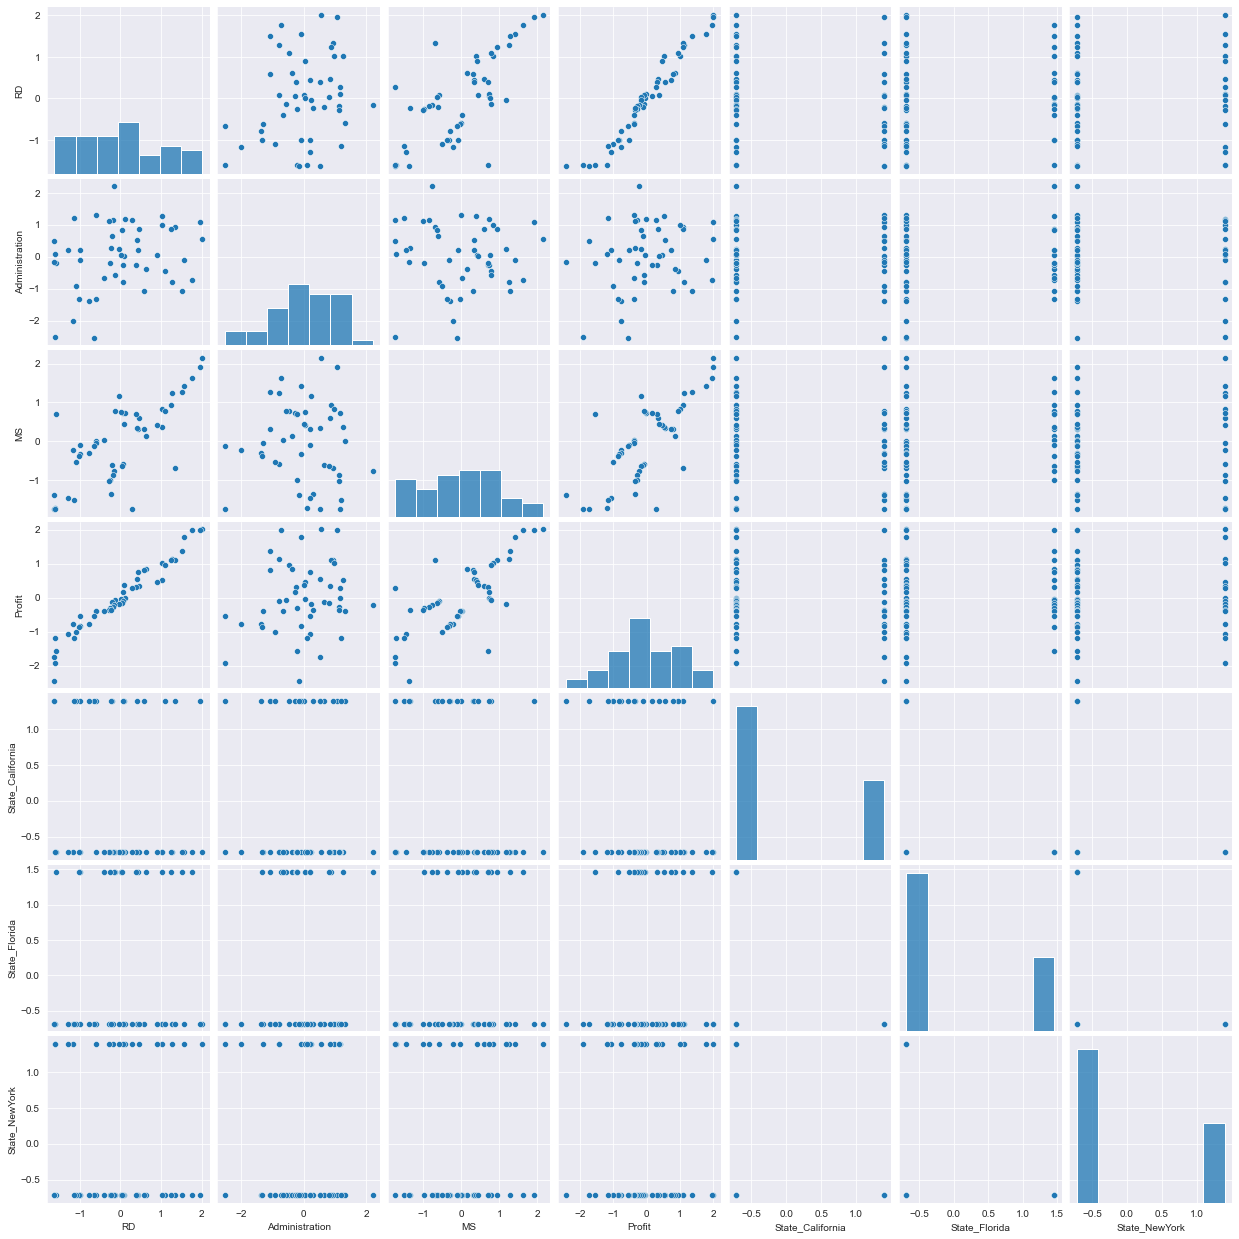

In [613]:
#format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(updated)
 

# No coorelation of state variable with other variables, so remove state variables.

# Model Building

In [614]:
 
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+Administration+MS',data=profit).fit()

In [615]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


# Model testing

In [616]:
#beta coefficients
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [617]:
#t and p values
print(model.tvalues, '\n', model.pvalues)


Intercept          7.626218
RD                17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [618]:
#R squared values
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# Build SLR and MLR models for insignificant variables 'Administration' and 'MS', as their p value>0.05
# Also find their tvalues and pvalues

In [619]:
slr_a=smf.ols("Profit~Administration",data=profit).fit()
slr_a.tvalues , slr_a.pvalues   # p value of administration is insignificant

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [620]:
slr_m=smf.ols("Profit~MS",data=profit).fit()
slr_m.tvalues , slr_m.pvalues  # MS has significant pvalue

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [621]:
mlr_am=smf.ols("Profit~Administration+MS",data=profit).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept         1.142741
 Administration    2.467779
 MS                8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MS                9.727245e-11
 dtype: float64)

# Model validation
1. Collinearity Check
2. Residual Analysis

In [622]:
#  Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols('RD~Administration+MS',data=profit).fit().rsquared
vif_r = 1/(1-rsq_r)  

rsq_a = smf.ols('Administration~MS+RD',data=profit).fit().rsquared
vif_a = 1/(1-rsq_a)  

rsq_m = smf.ols('MS~RD+Administration',data=profit).fit().rsquared
vif_m  = 1/(1-rsq_m)  

#storing vif values in a data frame
dd2= {'Variables':['RD','Administration','MS'], 'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,MS,2.326773


# No Collinearity, so consider all variables in Regression equation

In [647]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

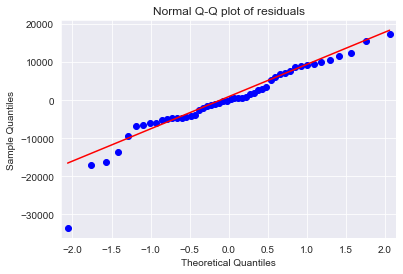

In [648]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [650]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49])]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

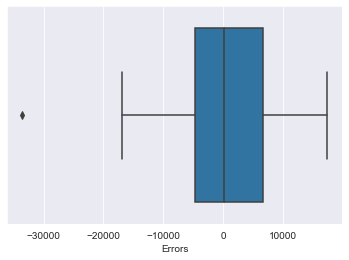

In [651]:
sns.boxplot(profit['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

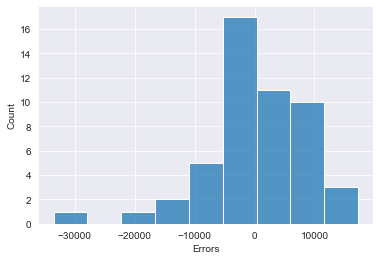

In [652]:
sns.histplot(profit["Errors"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

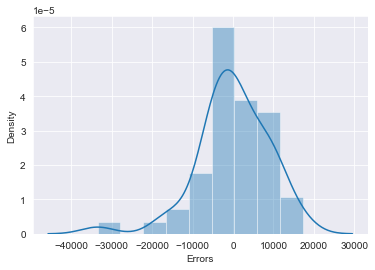

In [653]:
sns.distplot(profit['Errors'])

# Residual Plot for Homoscedasticity

In [654]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

0     2.048512
1     1.962904
2     1.784550
3     1.569528
4     1.529906
5     1.312132
6     1.173034
7     1.221564
8     1.010891
9     1.090863
10    0.597857
11    0.599503
12    0.435750
13    0.393765
14    0.955090
15    0.870779
16    0.124749
17    0.462578
18    0.432599
19    0.092175
20    0.117733
21    0.135030
22    0.068557
23   -0.051297
24    0.034359
25   -0.248719
26   -0.035929
27    0.060951
28   -0.263418
29   -0.259984
30   -0.319591
31   -0.364489
32   -0.331068
33   -0.358709
34   -0.584549
35   -0.547086
36   -0.934491
37   -0.569784
38   -1.076695
39   -0.719666
40   -0.946456
41   -0.946797
42   -1.053210
43   -1.319192
44   -1.206108
45   -1.637667
46   -1.420992
47   -1.667184
48   -1.598972
49   -1.623304
dtype: float64
0    -0.029001
1     0.294602
2     0.995289
3     1.029070
4    -0.665334
5    -0.736666
6    -0.222642
7    -0.477210
8     0.052550
9    -0.572899
10    1.186432
11    0.970983
12    1.391517
13    0.762344
14   -1.894413
15   -1.82

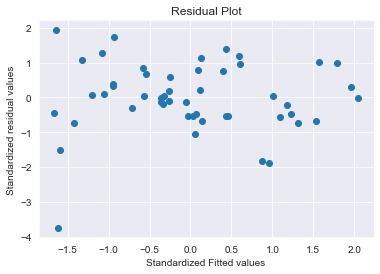

In [655]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))


plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors 


In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

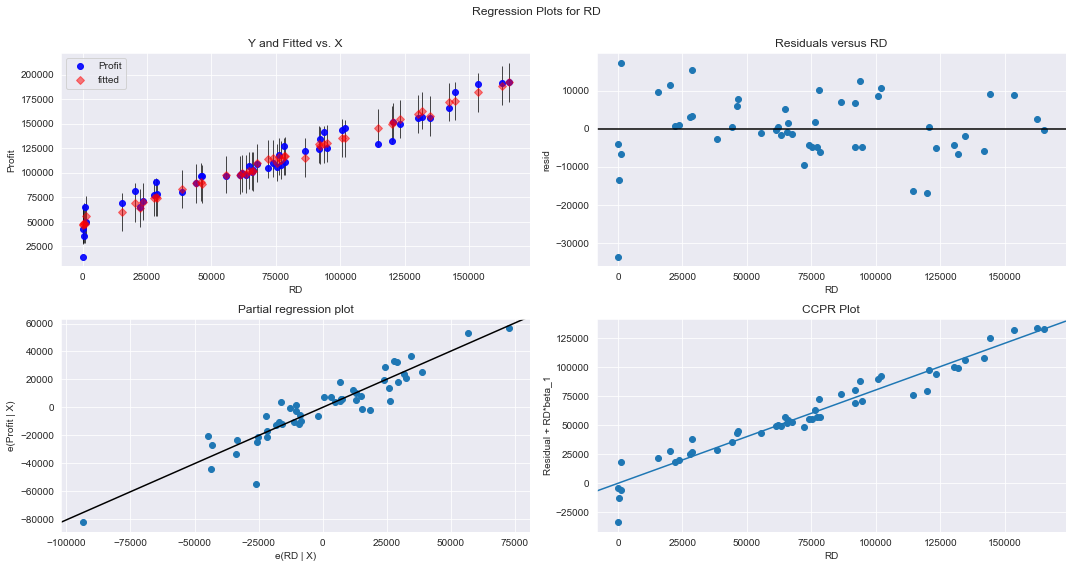

In [656]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

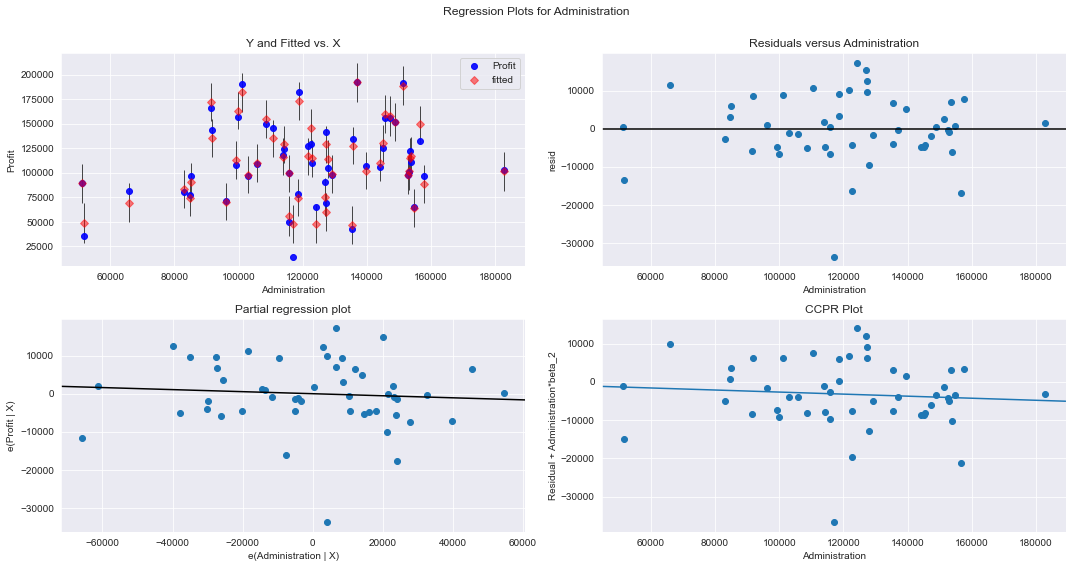

In [657]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

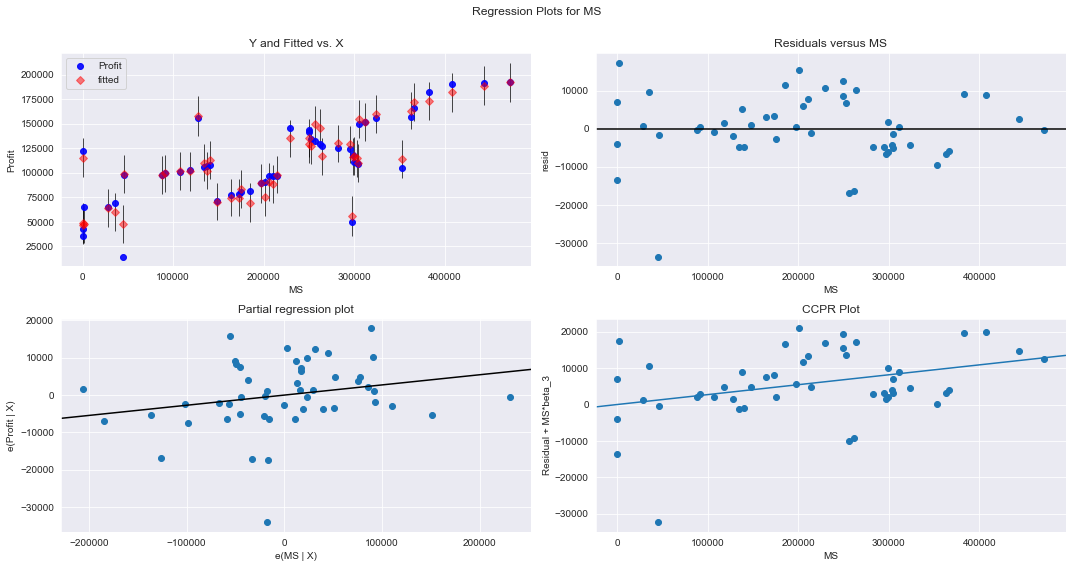

In [658]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [659]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

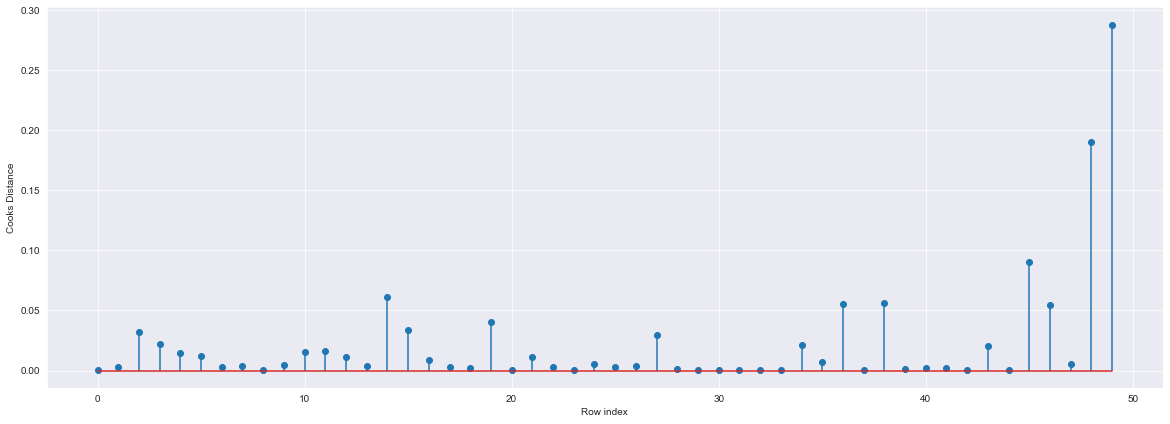

In [660]:
 #Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(profit)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [661]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

# High Influence points

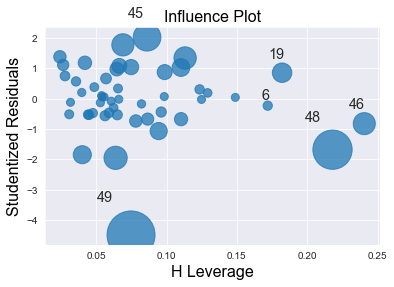

In [662]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [683]:
profit.shape

(50, 5)

In [684]:
profit.shape[1]

5

In [685]:
profit.shape[0]

50

In [687]:
k = profit.shape[1]
n = profit.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

# From the above plot, it is evident that data point 49 is influencer.

In [688]:
 profit[profit.index.isin([49])]

,RD,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [689]:
 #Discard the data points which are influencers and reasign the row number (reset_index())
profit1=profit.drop(profit.index[[49]],axis=0).reset_index()

In [690]:
#Drop the original index
profit1=profit1.drop(['index'],axis=1) 

In [691]:
 profit1

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [692]:
 model2=smf.ols("Profit~RD+Administration+MS",data=profit1).fit()

In [693]:
 while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD+Administration+MS",data=profit1).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        profit1=profit1.drop(profit1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        profit1
    else:
        final_model=smf.ols("Profit~RD+Administration+MS",data=profit1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [694]:
final_model.rsquared 

0.9882757054424702

# Predicting for new data

In [695]:
#New data for prediction
new_data=pd.DataFrame({'RD':80000,"Administration":120000,"MS":150000},index=[1])
new_data

,RD,Administration,MS
1,80000,120000,150000


In [697]:
#prediction of profit
final_model.predict(new_data)

1    113036.345783
dtype: float64

In [698]:
pred_y=final_model.predict(profit1)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# table containing R^2 value for each prepared model

In [699]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
